# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import json



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_data = []
#Log
print("Beginning Data Retrieval     ")
print("-----------------------------")

counter_city = 1
counter_set = 1

for i,city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        counter_set = counter_set + 1
        counter_city = 0
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    print(f"Processing Record {counter_city} of set {counter_set} | {city} ")
    counter_city = counter_city + 1
    try:
        weather_response = requests.get(query_url).json()
        city_lat = weather_response['coord']['lat']
        city_lng = weather_response['coord']['lon']
        city_max_temp = weather_response['main']['temp_max']
        city_humidity = weather_response['main']['humidity']
        city_claudiness = weather_response['clouds']['all']
        city_wind_speed = weather_response['wind']['speed']
        country = weather_response['sys']['country']
        date = weather_response['dt']
        city_data.append({
            'City':city,
            'Lat':city_lat,
            'Lng':city_lng,
            'Max Temp':city_max_temp,
            'Humidity':city_humidity,
            'Cloudiness':city_claudiness,
            'Wind Speed':city_wind_speed,
            'Country':country,
            'Date':date                    
        })
        
    except:
        print("City not found. Skipping...")
        pass
 #Log
print("-----------------------------")  
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | carnarvon 
Processing Record 2 of set 1 | upernavik 
Processing Record 3 of set 1 | zyryanka 
Processing Record 4 of set 1 | severo-kurilsk 
Processing Record 5 of set 1 | cape town 
Processing Record 6 of set 1 | faya 
Processing Record 7 of set 1 | dunedin 
Processing Record 8 of set 1 | albany 
Processing Record 9 of set 1 | ukiah 
Processing Record 10 of set 1 | yarada 
Processing Record 11 of set 1 | botwood 
Processing Record 12 of set 1 | oranjemund 
Processing Record 13 of set 1 | vaini 
Processing Record 14 of set 1 | san cristobal 
Processing Record 15 of set 1 | khorinsk 
Processing Record 16 of set 1 | rikitea 
Processing Record 17 of set 1 | new norfolk 
Processing Record 18 of set 1 | ancud 
Processing Record 19 of set 1 | hofn 
Processing Record 20 of set 1 | kaitangata 
Processing Record 21 of set 1 | bereda 
Processing Record 22 of set 1 | loiza 
Processing Record 23 of set 1 | h

Processing Record 32 of set 4 | malaya purga 
Processing Record 33 of set 4 | qaanaaq 
Processing Record 34 of set 4 | ranfurly 
Processing Record 35 of set 4 | longyearbyen 
Processing Record 36 of set 4 | belmonte 
Processing Record 37 of set 4 | bandarbeyla 
Processing Record 38 of set 4 | laguna 
Processing Record 39 of set 4 | meulaboh 
Processing Record 40 of set 4 | porto belo 
Processing Record 41 of set 4 | skibbereen 
Processing Record 42 of set 4 | talnakh 
Processing Record 43 of set 4 | anshun 
Processing Record 44 of set 4 | los llanos de aridane 
Processing Record 45 of set 4 | labutta 
City not found. Skipping...
Processing Record 46 of set 4 | vila 
Processing Record 47 of set 4 | dikson 
Processing Record 48 of set 4 | ulaangom 
Processing Record 49 of set 4 | khatanga 
Processing Record 0 of set 5 | champerico 
Processing Record 1 of set 5 | hasaki 
Processing Record 2 of set 5 | nueva loja 
Processing Record 3 of set 5 | jinchang 
Processing Record 4 of set 5 | alof

Processing Record 20 of set 8 | manosque 
Processing Record 21 of set 8 | san patricio 
Processing Record 22 of set 8 | xingcheng 
Processing Record 23 of set 8 | alice springs 
Processing Record 24 of set 8 | lolua 
City not found. Skipping...
Processing Record 25 of set 8 | nantucket 
Processing Record 26 of set 8 | somerset east 
Processing Record 27 of set 8 | mildura 
Processing Record 28 of set 8 | ucluelet 
Processing Record 29 of set 8 | te anau 
Processing Record 30 of set 8 | quelimane 
Processing Record 31 of set 8 | krasnoselkup 
Processing Record 32 of set 8 | dartford 
Processing Record 33 of set 8 | karratha 
Processing Record 34 of set 8 | ilo 
Processing Record 35 of set 8 | eugene 
Processing Record 36 of set 8 | sao carlos 
Processing Record 37 of set 8 | uruacu 
Processing Record 38 of set 8 | kununurra 
Processing Record 39 of set 8 | anchorage 
Processing Record 40 of set 8 | nishihara 
Processing Record 41 of set 8 | mecca 
Processing Record 42 of set 8 | nabire 

Processing Record 0 of set 12 | dondo 
Processing Record 1 of set 12 | naze 
Processing Record 2 of set 12 | mountain home 
Processing Record 3 of set 12 | konotop 
Processing Record 4 of set 12 | ivanteyevka 
Processing Record 5 of set 12 | inhambane 
Processing Record 6 of set 12 | chagda 
City not found. Skipping...
Processing Record 7 of set 12 | dolbeau 
City not found. Skipping...
Processing Record 8 of set 12 | krasnoarmeysk 
Processing Record 9 of set 12 | bilma 
Processing Record 10 of set 12 | tumannyy 
City not found. Skipping...
Processing Record 11 of set 12 | viedma 
Processing Record 12 of set 12 | tilichiki 
Processing Record 13 of set 12 | tiznit 
Processing Record 14 of set 12 | puga 
Processing Record 15 of set 12 | concordia 
Processing Record 16 of set 12 | parelhas 
Processing Record 17 of set 12 | petropavl 
Processing Record 18 of set 12 | manavalakurichi 
Processing Record 19 of set 12 | kailua 
Processing Record 20 of set 12 | lahij 
Processing Record 21 of se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:

city_df=pd.DataFrame(city_data)
city_df.to_csv('City_Weather_Data.csv')
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,298.15,100,40,3.60,AU,1613163872
1,upernavik,72.7868,-56.1549,255.14,80,0,3.04,GL,1613163651
2,zyryanka,65.7500,150.8500,239.50,85,95,1.77,RU,1613163794
3,severo-kurilsk,50.6789,156.1250,270.47,95,80,4.80,RU,1613163869
4,cape town,-33.9258,18.4232,294.82,83,0,7.72,ZA,1613163482


In [78]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,21.490792,16.106693,281.753122,74.232305,55.624319,3.673793,1.613164e+09
std,33.758378,94.057955,18.243073,19.095276,38.518502,2.798786,9.408694e+01
min,-54.800000,-179.166700,234.830000,12.000000,0.000000,0.130000,1.613163e+09
25%,-7.133050,-67.020750,270.420000,65.000000,20.000000,1.570000,1.613164e+09
50%,26.769300,24.833300,288.150000,79.000000,71.000000,3.000000,1.613164e+09
75%,50.150950,100.344850,297.560000,88.000000,90.000000,5.140000,1.613164e+09
max,78.218600,179.316700,304.440000,100.000000,100.000000,16.460000,1.613164e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
humidity_df = city_df.loc[city_df['Humidity'] > 100,['Humidity']]
humidity_df


,Humidity


In [82]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = city_df.loc[city_df['Humidity'] < 100,['Humidity']]
humidity_df.describe()

,Humidity
count,535.000000
mean,73.461682
std,18.843181
min,12.000000
25%,65.000000
50%,78.000000
75%,87.000000
max,99.000000


In [87]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
y = city_df['Humidity']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
index_names = city_df[~removed_outliers].index
clean_city_data = city_df.drop(index_names, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,upernavik,72.7868,-56.1549,255.14,80,0,3.04,GL,1613163651
2,zyryanka,65.7500,150.8500,239.50,85,95,1.77,RU,1613163794
3,severo-kurilsk,50.6789,156.1250,270.47,95,80,4.80,RU,1613163869
4,cape town,-33.9258,18.4232,294.82,83,0,7.72,ZA,1613163482
5,faya,18.3851,42.4509,288.15,72,0,2.57,SA,1613163797


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

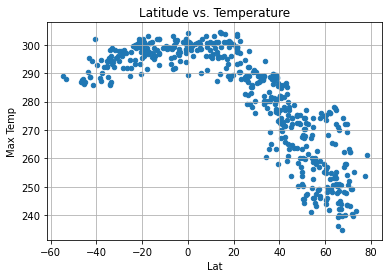

In [93]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,
              title="Latitude vs. Temperature")
plt.savefig("../Images/lat_vs_maxTemp.png")
plt.show()


## Latitude vs. Humidity Plot

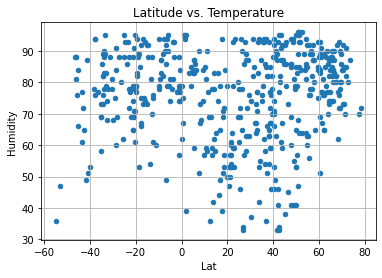

In [94]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
              title="Latitude vs. Temperature")
plt.savefig("../Images/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

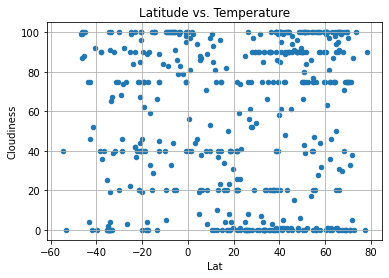

In [95]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
              title="Latitude vs. Temperature")
plt.savefig("../Images/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

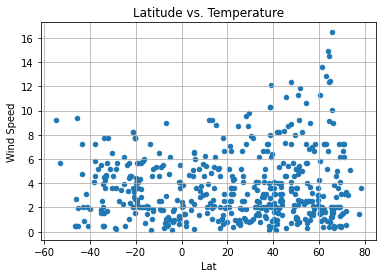

In [96]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
              title="Latitude vs. Temperature")
plt.savefig("../Images/lat_vs_windSpeed.png")
plt.show()

## Linear Regression

In [99]:
northern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0.0]
northern_hemisphere.reset_index(inplace=True)
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0.0]
southern_hemisphere.reset_index(inplace=True)



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7559334070777851


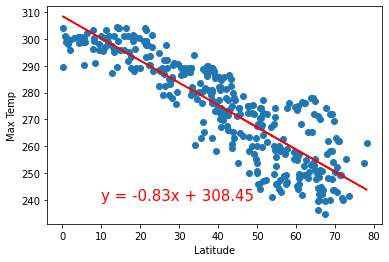

In [153]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_northern_maxTemp_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4262348211578426


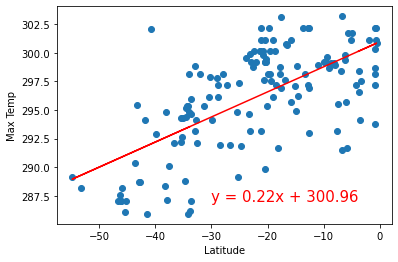

In [151]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,287),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_southern_maxTemp_vs_Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06880698910691488


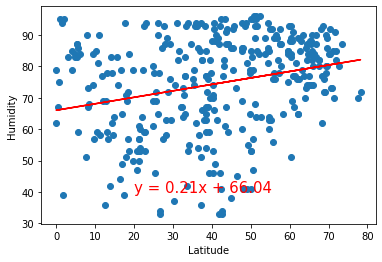

In [149]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_northern_humidity_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.050928624116245075


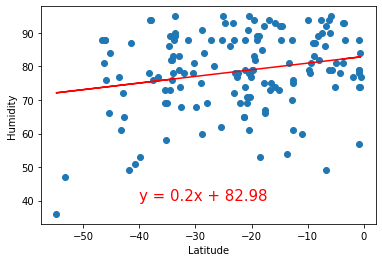

In [147]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_southern_humidity_vs_Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03324729880636708


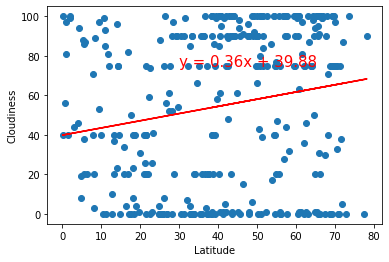

In [145]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_northern_cloudiness_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06920065433679412


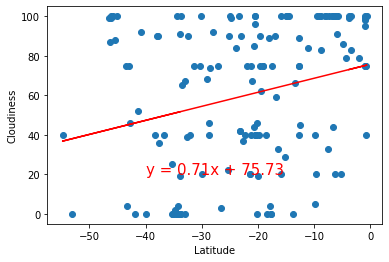

In [144]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_southern_cloudiness_vs_Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006758279394134903


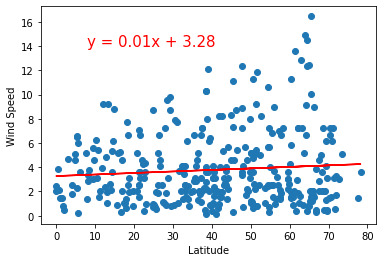

In [142]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_northern_windSpeed_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023149990643052887


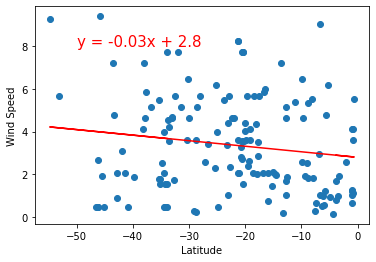

In [140]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression_southern_windSpeed_vs_Lat.png")
plt.show()